In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

In [20]:
df=pd.read_csv('Mall_Customers.csv')
print(df.isna().sum())
df.head()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 0, 'Annual Income (k$)')

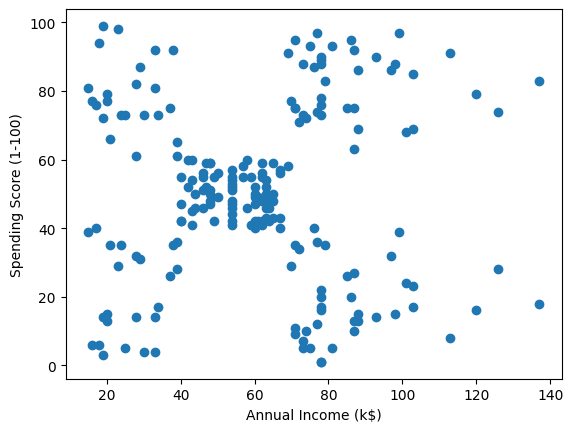

In [21]:
%matplotlib inline
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')

In [22]:
sse=[]
k_rang=range(1,10)
for k in k_rang:
    km=KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)


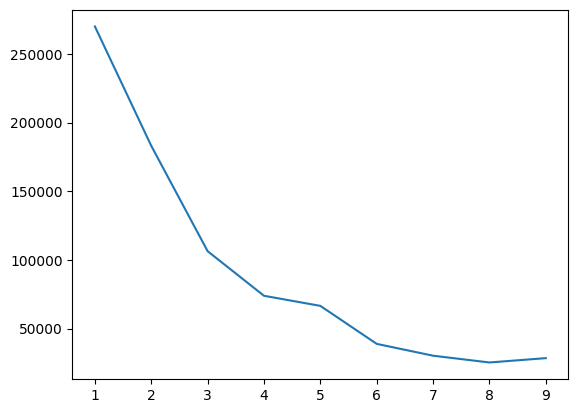

In [23]:
plt.plot(k_rang,sse)

In [24]:
km=KMeans(n_clusters=5)
y_pred=km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [26]:
df['cluster']=y_pred
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


In [27]:
cluster1=df[df.cluster==0]
cluster2=df[df.cluster==1]
cluster3=df[df.cluster==2]
cluster4=df[df.cluster==3]
cluster5=df[df.cluster==4]

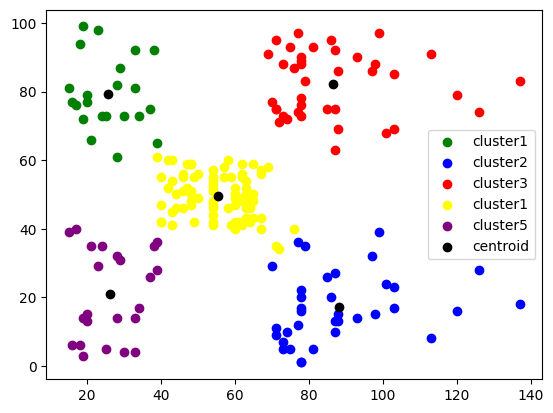

In [38]:
plt.scatter(cluster1['Annual Income (k$)'],cluster1['Spending Score (1-100)'],color='green',label='cluster1')
plt.scatter(cluster2['Annual Income (k$)'],cluster2['Spending Score (1-100)'],color='blue',label='cluster2')
plt.scatter(cluster3['Annual Income (k$)'],cluster3['Spending Score (1-100)'],color='red',label='cluster3')
plt.scatter(cluster4['Annual Income (k$)'],cluster4['Spending Score (1-100)'],color='yellow',label='cluster1')
plt.scatter(cluster5['Annual Income (k$)'],cluster5['Spending Score (1-100)'],color='purple',label='cluster5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',label='centroid')
plt.legend()